In [1]:
import cv2
import numpy as np
import plotly.express as px


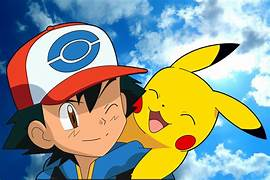

In [4]:
image_path = r"pokemon.jpeg"

img = cv2.imread(image_path)
if img is None:
    print(f"Failed to load image from '{image_path}'")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs = px.imshow(img)
    imgs.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
    imgs.show()


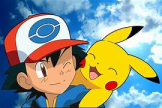

In [7]:
scale_percent = 60  # Adjust this percentage as needed
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
res = px.imshow(resized)
res.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
res.show()


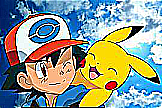

In [8]:
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(resized,-1,kernel_sharpening)
sharp = px.imshow(sharpened)
sharp.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
sharp.show()


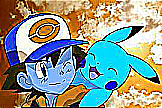

In [9]:
grayscale = cv2.cvtColor(sharpened,cv2.COLOR_BGR2RGB)
gray = px.imshow(grayscale,color_continuous_scale='gray')
gray.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
gray.show()


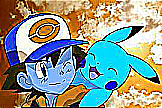

In [10]:
invs = 255-grayscale
inv = px.imshow(grayscale,color_continuous_scale='gray')
inv.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
inv.show()


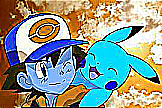

In [11]:
gauss = cv2.GaussianBlur(invs,ksize=(15,15),sigmaX = 0,sigmaY = 0)
gaus = px.imshow(grayscale,color_continuous_scale='gray')
gaus.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
gaus.show()

In [13]:
import cv2
import plotly.express as px
import numpy as np

def dodgV2(image, mask):
    return cv2.divide(image, 255 - mask, scale=256)

image_path = r"pokemon.jpeg"

img = cv2.imread(image_path)
if img is None:
    print(f"Failed to load image from '{image_path}'")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    inverted_gray = 255 - gray

    guass = cv2.GaussianBlur(inverted_gray, (21, 21), sigmaX=0, sigmaY=0)

    pencil_img = dodgV2(gray, guass)
    sketch = px.imshow(pencil_img, color_continuous_scale='gray')
    sketch.update_layout(coloraxis_showscale=False)
    sketch.show()